
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Magnificent 7 Stock Prices Analysis - yfinance



# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the well known 'magnificent 7' technology companies that dominate the S&P 500 stock exchange. These are the largest technological companies in the world & have historically made up a significant % weighting of the market capitalisation of the S&P 500. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Tesla.         | TSLA   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corportaion   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assigment is to demonstrate tools learned in the module

## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  - Import packages used.
- **2. Data Download** - We use yfinance to download the stock data.
- **3. Clean & Normalise Data**
- **3. Explore Data**
        - Resample (add plots)
        - Rolling Analysis (add plots)
        - Returns (Add plots)



thoughts

get weighting of mag7 in the s&p 500 MARKET CAP
look at % within their sectors maybe
ROLLING BALANCES  - BEST ONE ACROSS A QUARTER,YEAR - CALENDAR AND ROLLING YEAR MAYBE



In [4]:
# 1. Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Install yfinance if not already installed
#!pip install yfinance

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

import seaborn as sns



# Comments 1 - Download Dataset

i) We'll write a fucntion & download the stock info from yfinance - looking from the 1st Jan 2014 to the 30th Nov 2025 for the magnifcent 7
ii) download s&p 500  https://www.investing.com/academy/trading/what-is-the-sp-500/ & get %

Code is:

```python
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)
```

**yfinance download parameters:**

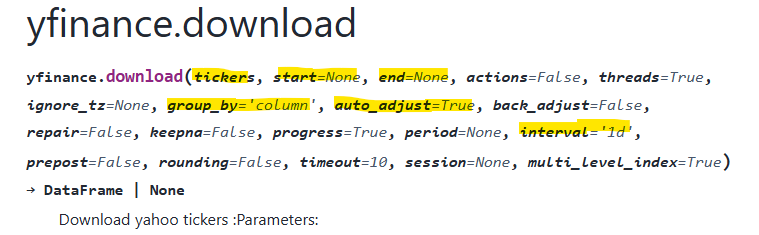


 - **tickers** - We state the company tickers that we need to download pricing information for.
 - **start** - We set the start date we wish to extract the pricing data from as the 1st January 2014.
 - **end** - We set the end date we wish to extract the pricing data from as the 30th November 2025.
 - **interval** - We set the interval time period we want to pull the data from. This can be from 1 minute,hourly, daily up to 3 months - we will use daily pricing data.
 - **group_by** - This sets the order of the columns(headers) - we group the pricing information by **ticker** first and then by **column**, easier to extract pricing data for one ticker this way. If not stated default is to group by **column** only.
     - This gives a multi-index structure where we have two level headers:
         - Level 0 - Ticker type (META,AAPL,AMZN,TSLA,GOOG,NVDA,MSFT)
         - level 1 - Price type (Open,High,Low,Close,Volume)
 - **auto_adjust** - This adjusts the pricing data to account for stock splits and dividends. Default if not stated is **True**




In [5]:
 # Set up the function 'get_data()' that can be called for closing prices of FAANG stocks over the last 10 years
   
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)


# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html




[*********************100%***********************]  7 of 7 completed


# Comments 2 - Download Dataset
In order to explore the data, we'll save the file to a csv folder, we will usa a placeholder for the file name.

In [6]:
# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# Comment 3 - Initial Exploratory Analysis & Cleaning

We will view the first five rows **df.head()**, last five rows **df.tail()** & use **df.info** to show the index range, columns count & names - we also display non-null values & the datatype

- **df.head()** & **df.tail()** show a clear visual of MultiIndex structure - with level 0 **Ticker** (META, AAPL, MSFT,...) & level 1 **Price** (Open, High, Low,...) data shown.
    The data suggests a significant increase in adjusted prices between the opening five rows (early January 2014 pricing) and the last five rows (late November 2025 pricing).As an example, **Meta's** adjusted opening price on the 2nd January 2014 was **54.44 (rounded)** and had increased to **635.56 (rounded)** by the 28th November 2025.

- **df.info()** displays key information about the dataset:
    - Confirms a pandas DataFrame structure - **<class 'pandas.core.frame.DataFrame'>**
    - Confirms a DatetimeIndex with 2996 days of price data, ranging from January 2nd 2014 to 28th Novemeber 2025 - **DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28**
    - Confirms 35 columns and the columns naming convention in a MultiIndex structure that we saw initially also using df.head() & df.tail()
    - Confirms non-null values with **Non-Null Count** & that our data types is floats & integers for pricing information.  

       **See image below with df.info() information for first two stocks shown.**

    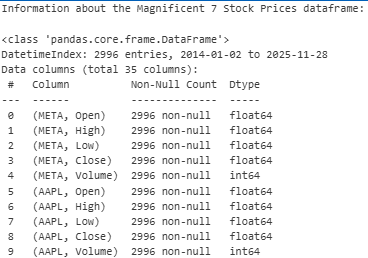

    - **df.isnull().sum()** is also used to confirm missing null values present.This checks each column for null entriew & returns the count. This method focuses purely on identifying missing data and can be used in conjunction with **df.info()** which is more a high-level overview of all key information.
    We see 0 returned which gives us confidence to proceed with further analysis of the dataset.
    It was expected that no non-null values would be present - yfinance excludes non-trading days - it is still important to verify the dataset before proceeding with further analysis as this may not always be the case with other datasets.



In [7]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# Display the first 5 rows of the dataframe
print("First 5 rows of the Magnificent 7 Stock Prices dataframe:\n")
display(df.head())

# Display the first 5 rows of the dataframe
print("Last 5 rows of the Magnificent 7 Stock Prices dataframe:\n")
display(df.tail())

# Info about the dataframe
print("Information about the Magnificent 7 Stock Prices dataframe:\n")
df.info()


First 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker           AAPL                                                   MSFT  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2014-01-02  17.235803  17.277676  17.122279  17.156708  234684800  30.988770   
2014-01-03  17.148323  17.174376  16.762774  16.779835  392467600  30.864305   
2014-01-06  16.670347  16.960359  16.550929  16.871340  412610800  30.573929   
2014-01-07  16.883439  16.934307  16.684928  16.750685  317209200  30.142493   
2014-01-08  16.712531  16.921900  16.708811  16.856764  258529600  29.868703   

Ticker                                                 ...       META  \
Price            High        Low      Close    Volume  ...       Open   
Date                                                   ...              
2014-01-02  31.030257  30.781349  30.831131  30632200  ...  54.449653   
2014-01-03  30.880899  30.366492  30.623695  31134800  ...  54.638334   
2014-01-06  30.607117  29.959963  29.976557  43603700  ...  54.042493   
2014-01-07  30.275243  30.042928  30.208866  35802800  ...  57.299751   
2014-01-08  29.984858  29.520236  29.669577  59971700  ...  57.200434   

Ticker                                                      TSLA             \
Price            High        Low      Close    Volume       Open       High   
Date                                                                          
2014-01-02  54.836947  53.814089  54.330482  43195500   9.986667  10.165333   
2014-01-03  55.263965  54.151732  54.181526  38246200  10.000000  10.146000   
2014-01-06  56.862793  53.675061  56.803211  68852600  10.000000  10.026667   
2014-01-07  58.143854  56.823082  57.518223  77207400   9.841333  10.026667   
2014-01-08  58.004817  56.833002  57.826065  56682400   9.923333  10.246667   

Ticker                                     
Price            Low      Close    Volume  
Date                                       
2014-01-02  9.770000  10.006667  92826000  
2014-01-03  9.906667   9.970667  70425000  
2014-01-06  9.682667   9.800000  80416500  
2014-01-07  9.683333   9.957333  75511500  
2014-01-08  9.917333  10.085333  92448000  

[5 rows x 35 columns]

Last 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker            AAPL                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  265.950012  273.329987  265.670013  271.489990  59030800   
2025-11-24  270.899994  277.000000  270.899994  275.920013  65585800   
2025-11-25  275.269989  280.380005  275.250000  276.970001  46914200   
2025-11-26  276.959991  279.529999  276.630005  277.549988  33431400   
2025-11-28  277.260010  279.000000  275.989990  278.850006  20135600   

Ticker            MSFT                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-11-21  478.500000  478.920013  468.269989  472.119995  31769200  ...   
2025-11-24  475.000000  476.899994  468.019989  474.000000  34421000  ...   
2025-11-25  474.070007  479.149994  464.890015  476.989990  28019800  ...   
2025-11-26  486.309998  488.309998  481.200012  485.500000  25709100  ...   
2025-11-28  487.600006  492.630005  486.649994  492.010010  14386700  ...   

Ticker            META                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  588.020433  597.632589  581.385829  593.765747  21052600   
2025-11-24  598.232075  616.197465  597.142998  612.550415  23554900   
2025-11-25  623.491465  636.530818  617.796098  635.701477  25213000   
2025-11-26  637.170320  637.839757  631.115261  633.093628  15209500   
2025-11-28  635.561675  647.521891  634.982130  647.421997  11033200   

Ticker            TSLA                                                 
Price             Open        High         Low       Close     Volume  
Date                                                                   
2025-11-21  402.320007  402.799988  383.760010  391.089996  100460600  
2025-11-24  402.170013  421.720001  401.089996  417.779999   96806400  
2025-11-25  414.420013  420.480011  405.950012  419.399994   71915600  
2025-11-26  423.950012  426.940002  416.890015  426.579987   63463000  
2025-11-28  426.589996  432.929993  426.200012  430.170013   36252900  

[5 rows x 35 columns]

Information about the Magnificent 7 Stock Prices dataframe:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AAPL, Open)    2996 non-null   float64
 1   (AAPL, High)    2996 non-null   float64
 2   (AAPL, Low)     2996 non-null   float64
 3   (AAPL, Close)   2996 non-null   float64
 4   (AAPL, Volume)  2996 non-null   int64  
 5   (MSFT, Open)    2996 non-null   float64
 6   (MSFT, High)    2996 non-null   float64
 7   (MSFT, Low)     2996 non-null   float64
 8   (MSFT, Close)   2996 non-null   float64
 9   (MSFT, Volume)  2996 non-null   int64  
 10  (AMZN, Open)    2996 non-null   float64
 11  (AMZN, High)    2996 non-null   float64
 12  (AMZN, Low)     2996 non-null   float64
 13  (AMZN, Close)   2996 non-null   float64
 14  (AMZN, Volume)  2996 non-null   int64  
 15  (NVDA, Open)    2996 non-null   float64
 16 

In [8]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# check for null values
df.isnull().sum()


# References:
# Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html


Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

# Comment 4 - Price Analysis (Closing Prices)

We extract the closing prices from our DataFrame and link this to the variable**closing_prices**. It is good practice to link the data to a variable rather than referencing individual stock tickers directly, as this allows us to expand/amend the stock ticker company information that we wish to analyse.
As we have a MultiIndex DataFrame we cannot directly call the closing prices using **df['Close']**
We will use **df.xs()** -  this allows us to return a specified section of the DataFrame - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)

```python
closing_prices= df.xs('Close', level=1, axis=1)
```

ii)
We will now plot the closing prices for the seven stocks across the time horizon January 2014 - November 2025 to see the price movements.

In [9]:
# # Comment 4 - Price Analysis (Closing Prices)


# Get closing prices only from multiindex dataframe
closing_prices= df.xs('Close', level=1, axis=1)                                 # Reference:  https://www.w3schools.com/python/pandas/ref_df_xs.asp     # xs() function to extract cross-section of data from multiindex dataframe
                                                                                # Reference: Pandas MultiIndexing - https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing
 

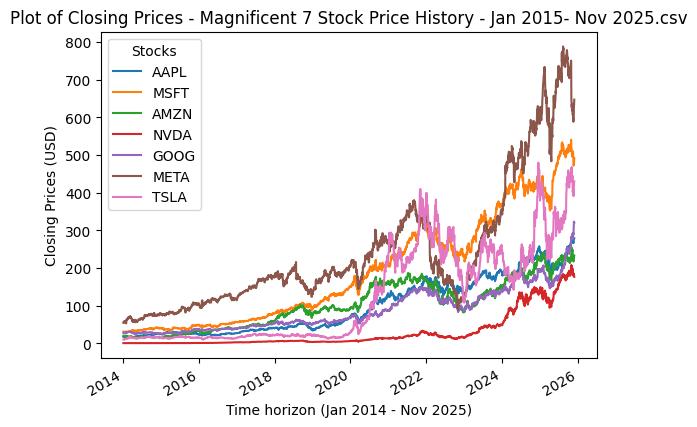

In [10]:
# Comment 4 - Price Analysis (Closing Prices)

#Create new figure and axis
fig, ax = plt.subplots()                                                            # References: Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (Jan 2014 - Nov 2025)")
ax.set_ylabel("Closing Prices (USD)")

#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")

# Show plot
plt.show()


# Comment 4 - Price Analysis (Closing Prices)

This plot shows that all seven stocks have had long term growth over the period (January 2014 to November 2025). 
Due to different pricing levels for each stock it is difficult to directly compare on a price basis.
We will look at stock % returns and re-indexing the price series to allow a more accurate comparison in future steps.


# Comment 5 - Resampling & returns Analysis


Financial performance, particularly for hedge funds and asset managers, is typically reported to investors on a monthly or quarterly basis rather than daily. This frequency reduces the noise from daily fluctuations on the stock and allows investors to see the rate of return (ROR) month on month.

For more illiquid asset classes, such as private equity funds,  valuations are often available only on a quarterly basis. This is due to the difficulty in pricing non-publicly traded assets, including buildings, infrastructure projects, and private companies.

Although, in this instance, the Magnificent 7 stocks trade daily, we will resample the data  to more closely reflect a real-world financial reporting scenario in a hedge fund. 

## Step 1 - Resample data

**Pandas resampling**  allows us to customise the time periods for our data into smaller time periods - we will convert the data from daily to (i) **Monthly (month-end prices)** ; (ii) **Quarterly (quarter-end prices)** ; (iii) **Yearly (year-end prices)**. [Reference: pandas - resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)


See below:

```python
# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last() 
```
 - **BME/BQE/BYE** is used to group the rows into monthly/quarterly/yearly data. **'B'** represents **Business**, this is applied to Month/Quarter/Yearly End
 - **.last()** is used to select the final prices in the resampled grouped period(s) (monthly/quarterly/yearly)


## Step 2 - Extract Closing Prices only from resampled data

Our data is now grouped as per the above resampled period (**Step 1**), we are displaying **Open, High, Low, Close, Volume** pricing data grouped per each applicable stock.
We now want to extract **Close** pricing information for each stock.
We use the resampled data for the periods (monthly/quarterly/yearly) to now extract the **Close** price only using **.xs**. This allows us to return a specifed section of the dataframe - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)


 - **'close'** - this is the key parameter we want **'close'**
 - **level=1** - give us access to the price column as it is a multi level index. level=0 would be the tickers.
 - ***axis=1** - points to the columns rather than the default=0 which is the rows. **'close'** is not present in the rows.

```python
# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)
```


## Step 3 - Get % change of returns across the periods (closing prices)

Our data is now grouped with the closing prices only for our resampled periods.  
We will now get the percentage change from the first data point to the second and consecutively thereforth for each data point. This is done using **.pct_change** method  (https://www.w3schools.com/python/pandas/ref_df_pct_change.asp) which by default shows the percantage change between each row - current row - and the previous row. This allows us to see increase/decrease in stock performance across the Month/Quarter/Yearly resampled closing price periods.

 - **.dropna()** - drops the na that will appear for the first row in each of our dataframes as we are comparing the first row against no prior data. **Need to update - This drops the year 2014 completely which is not desired so we will need to add code** to capture the first year.
 -**100** - we multiply by 100 to convert to % terms from decimals as easier to view change in % terms , also mirrors real life scenario comparisons.

```python
# Calculate Monthly/Quarterly/Yearly Returns
monthly_returns = monthly_close.pct_change().*100              # Multiply by 100 as to get percentage returns - decimals hard to easily read
quarterly_returns = quarterly_close.pct_change().*100
yearly_returns = yearly_close.pct_change().*100
```


These time horizons are how hedge funds performance & rate of return is presented in marketing materials to existing investors & prospective investors, allowing for easier comparison across the industry.


In [11]:
# Month end closing prices - standard in industry to use month end prices for analysis
# References:
# Pandas Resample - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# Pandas Offset Aliases - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   # Used Business month end(BME) rather than month end (ME) as stocks open on business days only, accounted for in yfinance data already
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last()  


# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)

# pct_change()= % change between current & previous row
# https://www.w3schools.com/python/pandas/ref_df_pct_change.asp

# Calculate Monthly/Quarterly/Yearly Returns
# Monthly:
monthly_returns = monthly_close.pct_change()*100                                       # Multiply by 100 as to get percentage returns - decimals hard to easily read
monthly_returns.iloc[0] = ((monthly_close.iloc[0] / closing_prices.iloc[0]) - 1)*100  # First month return calculation as pct_change() gives NaN for first row
monthly_returns = monthly_returns.round(2)                                              # Round to 2 decimal places for easier reading

# Quarterly:
quarterly_returns = quarterly_close.pct_change()*100
quarterly_returns.iloc[0] = ((quarterly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
quarterly_returns = quarterly_returns.round(2)


# Yearly:
yearly_returns = yearly_close.pct_change()*100
yearly_returns.iloc[0] = ((yearly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
yearly_returns = yearly_returns.round(2)



In [12]:
# Comment 5 - Resampling & returns Analysis

# Display summary statistics of monthly returns
monthly_returns.describe()

Ticker,AAPL,MSFT,AMZN,NVDA,GOOG,META,TSLA
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000
mean,2.261958,2.138182,2.106503,5.212378,1.973706,2.20972,4.054895
std,7.721504,6.123760,8.741707,12.960279,7.037217,9.58238,17.584627
min,-18.120000,-13.020000,-23.750000,-32.030000,-17.670000,-32.63000,-36.730000
25%,-3.295000,-1.485000,-4.210000,-2.600000,-2.080000,-3.61000,-7.485000
50%,2.770000,2.050000,2.150000,4.360000,1.820000,1.76000,0.850000
75%,7.755000,5.980000,7.485000,12.925000,6.645000,8.16000,12.635000
max,21.660000,19.630000,27.060000,38.540000,20.190000,27.16000,74.150000


## Comment 5 - Resampling & returns Analysis

We can see from the above:

**mean** - This shows the average month on month return across the period ( Jan 1st 2104 - 30th Novemebr 2025)  
     - Monthly average returns are positive for all stocks, with range between 1.9% - 5.25%.  
     - **Nividia** has the highest monthly average return with a healthy 5.25% mean return  
     - **Google** has the lowest monthly average return with 1.94%  

**std** - This shows the **standard deviation** (how much the returns vary) across the period. Higher the more volatile(risky) the returns.
     - **Tesla** is the most volatile(17.58%) & **Nividia**(12.99%) is 2nd most volatile, then **Meta**(9.56%)  
     - **Microsoft** (6.14%) is the lowest/least volatile returns.  

**min** - This shows the biggest loss month on month.  
      - **Tesla**(-36.73%), **Meta**(-32.63%) & **Nividia**(-32.02%) have seen the biggest month on month loss in the period.  
      - **Microsoft** had the lowest % loss (-13.02%)  
      - This is broadly consistent with stocks that had the highest & lowest standard deviation  

**25%** - This shows how many of the returns were in the lowest 25% quarttile.  
     - **Tesla** led this - 25% of returns are worse than **-7.58%**.  
     
**50%** - This shows the median return of the stocks. Median counts the value in the middle & reduce low or high outliers in % returns.  
      - All stock had positive returns, **Nividia** (4.93%) being the highest  

**75%** - This shows how many of the returns were in the highest 25% quartile.  
      - **Nividia**(13.04%) & ***Tesla** (12.16%) had the highest %, 25% of returns are above this value.  

**max** - This shows the highest % return in the period.  
     - **Tesla** (74.14%) & **Nividia**(38.54%) had the largest rate of return.  
     - Other stocks performed strongly - Microsoft (19.62%) being the lowest.  

The **Tesla** 74.14% is a massive outlier in month on month increase. Upon investigation , this was a genuine monthly return and was due to pricing speculation after Tesla announced a 5-for-1 stock split in August 2020.[Tesla stock jump](https://www.cnbc.com/2020/08/31/apple-tesla-jump-as-stock-splits-take-effect.html?msockid=11017dd644a966b708f66faa45d66739)  
Stock split lowers the price of a single share - value of a share is reduced proportionately to the split - so that investors that were priced out of buying a single stock now may be able to trade the stock due to the reduced price.  

**Tesla** was shown to be the most volatile from the standard deviation of returns(17.58%). This can be seen by the stock leading the way with the biggest loss(-36.73%) and the highest return(74.14%)  
Investors with a high risk appetite might favour this stock while investors drawn to more stable returns might prefer **Microsoft** which had the lowest standard deviation (6.14%); the lowest loss (-13.02%) & stable mean(2.13%) & median returns(2.04%)  





# Comment  6 - yearly returns ror



In [30]:
# Comment  6 - yearly returns ror

print("Year-on-Year Growth % of the Magnificent 7 Stocks")

# yearly_returns - rounded to 2 decimal places (statndard practice for reporting returns)
display(yearly_returns.round(2))


Year-on-Year Growth % of the Magnificent 7 Stocks


Ticker,AAPL,MSFT,AMZN,NVDA,GOOG,META,TSLA
Date,,,,,,,
2014-12-31,42.63,28.42,-22.02,28.68,-5.32,42.61,48.17
2015-12-31,-3.01,22.69,117.78,67.12,44.56,34.15,7.91
2016-12-30,12.48,15.08,10.95,226.96,1.71,9.93,-10.97
2017-12-29,48.46,40.73,55.96,81.99,35.58,53.38,45.70
2018-12-31,-5.39,20.80,28.43,-30.82,-1.03,-25.71,6.89
2019-12-31,88.96,57.56,23.03,76.94,29.10,56.57,25.70
2020-12-31,82.31,42.53,76.26,122.30,31.03,33.09,743.44
2021-12-31,34.65,52.48,2.38,125.48,65.17,23.13,49.76
2022-12-30,-26.40,-28.02,-49.62,-50.26,-38.67,-64.22,-65.03


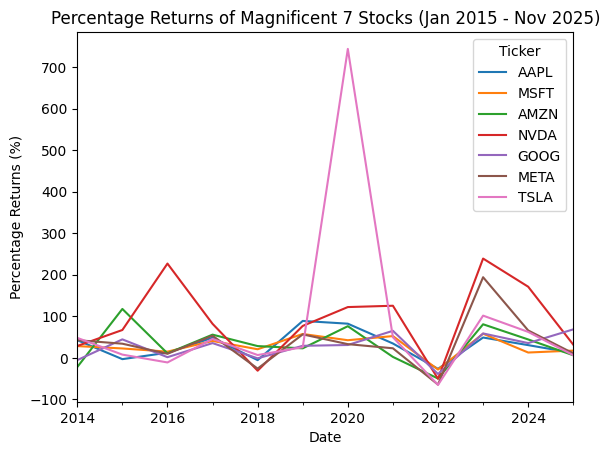

In [14]:
# Plot the percentage returns for each stock over the time period
yearly_returns.plot(title="Percentage Returns of Magnificent 7 Stocks (Jan 2015 - Nov 2025)", ylabel="Percentage Returns (%)", xlabel="Date")
plt.show()

# Comment 6 - 

We plot the percentage returns - visually clear Nividia have had massive growth but difficult to see growth of the other stocks relative to Nividia.

Re-index the intial value of all stocsk to 100 and then track growth from this to make easy comparison across the 7 stocks
reference: https://stackoverflow.com/questions/61128874/python-timeseries-normalize-scaling-to-base-100






<Figure size 1200x600 with 0 Axes>

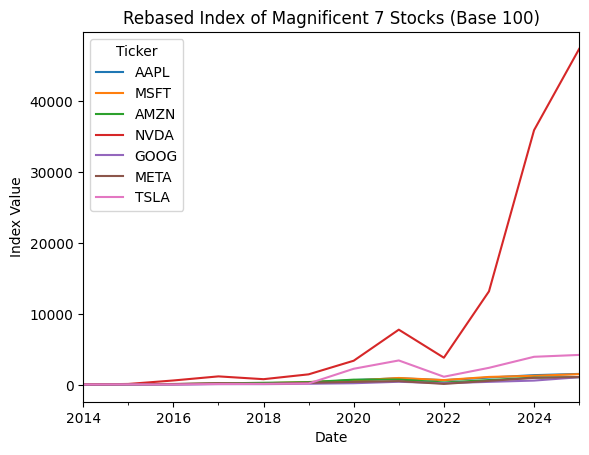

<Figure size 1200x600 with 0 Axes>

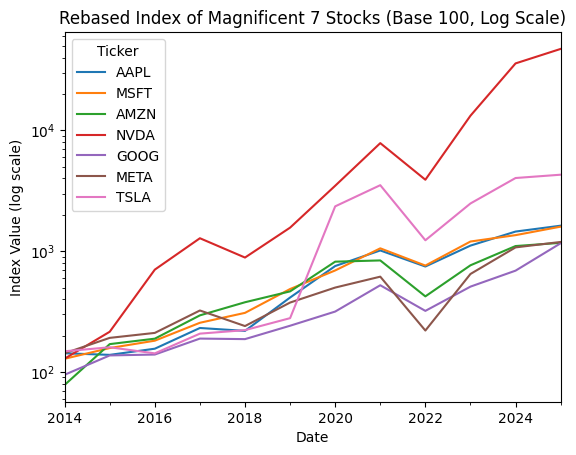

In [15]:
# Comment 6 - Rebased Index Analysis (Base 100)

# Rebase all stocks to 100 starting price & get cunmulative yearly returns
df_indexed_yearly = 100 * (1 + yearly_returns/100).cumprod()      #Reference: cumprod() function - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html

# Plot 
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100)")
plt.ylabel("Index Value")
plt.xlabel("Date")
plt.show()

# Plot on log scale - code adapted from chatgpt for logscale plot - Reference: https://chatgpt.com/share/69542880-0d10-8005-95e2-76895301c68a
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.yscale('log')                    # Set y-axis to log scale
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100, Log Scale)")
plt.ylabel("Index Value (log scale)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()




In [29]:
# Comment 6 - Rebased Index Analysis (Base 100)

# See value of 100 investment at start date vs end date

initial_investment = 100


# Get a table that shows starting investment vs ending investment with % growth for each stock
# Code adapted with assistance from GitHub Copilot
investment_growth = pd.DataFrame({
    'Starting Investment ($)': [initial_investment]*len(df_indexed_yearly.columns),
    'Final Investment ($)': df_indexed_yearly.iloc[-1],           # Final Investment Value
    'Percentage Growth (%)': ((df_indexed_yearly.iloc[-1] - initial_investment) / initial_investment * 100)     
}, index=df_indexed_yearly.columns)


# Sort highest to lowest growth
investment_growth = investment_growth.sort_values(
    by='Percentage Growth (%)',
    ascending=False
)

# Display formatted table (presentation only)
investment_growth.style.format({
    'Starting Investment ($)': '${:,.0f}',
    'Final Investment ($)': '${:,.0f}',
    'Percentage Growth (%)': '{:,.0f}%'
})





,Starting Investment ($),Final Investment ($),Percentage Growth (%)
Ticker,,,
NVDA,$100,"$47,342","47,242%"
TSLA,$100,"$4,299","4,199%"
AAPL,$100,"$1,626","1,526%"
MSFT,$100,"$1,596","1,496%"
META,$100,"$1,192","1,092%"
AMZN,$100,"$1,172","1,072%"
GOOG,$100,"$1,163","1,063%"


## # Comment 6 - Rebased Index Analysis (Base 100)

After re-basing the stock prices to 100 & using yearly returns - to plot long term growth trend of the companies - to compare the growth of each of the companies rather than price movement. 
Re-indexing to 100 sets all the stocks to the same initial value 100 from the start of the dataset & allows us to analyse the cumulative growth of each stock year on year.

i) Rebased Index - Non Log Scale
**Nvidia** has had significantly more growth since 2014 compared to the other companies. Nvidia dominates the plot & it is difficult to interpret the results clearly for the other companies as they appear compressed due to the large scale of the plot 


ii) Rebased Index - Log Scale
To visually show a more meaningful plot we use a logarithmic scale. Log scales are used when there is a wide variation in range of values as it allows the values to be displayed without the very small or very large values to be compressed at either end of the plot - very large Nvidia value in our exampl - with equal vertical distances representing equal percentage changes. Adapted from [Logarithmic Axes with Matplotlib](https://towardsdatascience.com/plot-logarithmic-axes-matplotlib-python-bb8533f430c0/)
**Nvidia** has had consistent high growth since 2014, **Tesla** had strong growth, especially from 2019 onwards - both companies potentially being postivily impacted by macroeconomic factors like the COVID-19 lockdowns & the market correction in 2022 seems to affect all seven stocks.



 


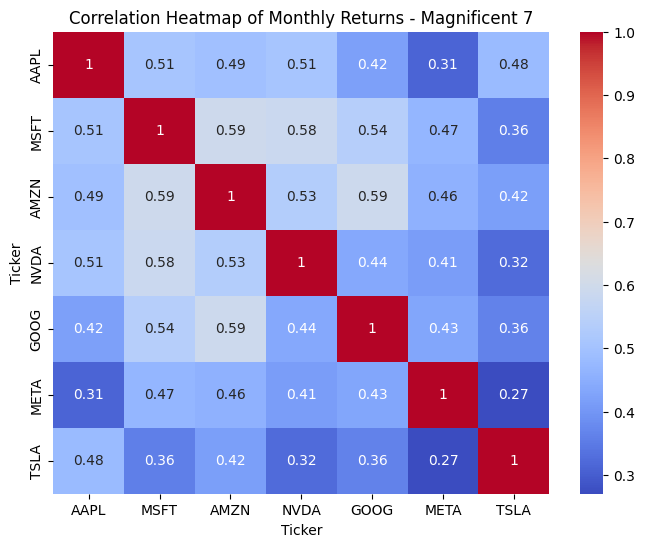

In [17]:
#Correlation between stocks based on monthly returns
correlation_matrix = monthly_returns.corr()

# Plot heatmap of correlation matrix                        Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Monthly Returns - Magnificent 7")
plt.show()
 

# 7 - Corrleaion between increase/decrease in volume if this has correlation to price momenet

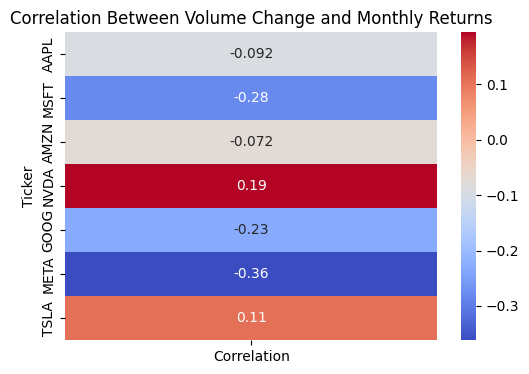

In [18]:
# Get trading volume
volume = df.xs('Volume', level=1, axis=1)

# Resample to monthly volume
monthly_volume = volume.resample('BME').sum()

# Percentage change in volume
volume_change = monthly_volume.pct_change() * 100



# Correlation between volume changes and returns
volume_price_corr = volume_change.corrwith(monthly_returns)

plt.figure(figsize=(6, 4))
sns.heatmap(
    volume_price_corr.to_frame(name="Correlation"),
    annot=True,
    cmap="coolwarm",
    
)
plt.title("Correlation Between Volume Change and Monthly Returns")
plt.show()

# 8 -  Add rolling balances